# TP2 - Ejercicio 5

## Consignas
Dada la siguiente plantilla:

![Plantilla_PA](img/ej5_plantilla_pa.JPG)

* Determinar un filtro que satisfaga la plantilla con el menor orden posible.
* Comparar los resultados con los polos del ejercicio 4.
* Implementar el circuito con estructuras pasivas adaptadas mediante buffers.
* Utilizando una norma de impedancia $Z_N = 2,2K\Omega$, obtenga el valor de los componentes.
* Active las bobinas utilizando una estructura con OTAs.

## Resolución

Pasamos la plantilla a frecuencia angular y normalizamos en función de $f_p$.

<div><img src="img/ej5_plantilla_normalizada.jpeg" width="500"/></div>


A continuación, s edebe obtener la plantilla del filtro pasa-bajos prototipo a través de la función de transformación:

$\Omega = \frac{1}{\omega}$

$\Omega_p = \frac{1}{\omega_p} = 1$

$\Omega_s = \frac{1}{\omega_s} = 3$

Plantilla del filtro pasa-bajos prototipo:

<div><img src="img/ej5_plantilla_prototipo_PB.jpeg" width="500"/></div>


Como se debe obtener el filtro de menor orden posible, planteamos una aproximación por Chebyshev.

$|T(j\Omega)|^2=\frac{1}{1+\epsilon^2 . {C_n}^2(\Omega)}$

$C_n(\Omega) = cosh(n . cosh^{-1}(\Omega))$

$C_n(\Omega) = 2 . \Omega . C_{n-1} - C_{n-2}$

$C_0 = 1$

$C_1 = \Omega$

Para $\Omega = 1$: ${C_n}^2(\Omega) = 1$, por lo cual podemos despejar $\epsilon^2$ como:

$\epsilon^2=10^{\frac{\alpha_{max}}{10}}-1 = 0,0964$

$\epsilon = 0,31$

Luego, podemos hallar el $n$ iterando.

In [1]:
import numpy as np

ws = 3
ee = 10**(0.4/10)-1
print(f'ee: {ee}')

for n in range(1,7):
    Cn = np.cosh(n*np.arccosh(ws))
    alpha = 10*np.log10(1+ee*Cn**2)
    print(f'alpha(n = {n}) = {alpha}')

ee: 0.09647819614318509
alpha(n = 1) = 2.714474890586518
alpha(n = 2) = 14.606302512446167
alpha(n = 3) = 29.761586089852262
alpha(n = 4) = 45.067943217860424
alpha(n = 5) = 60.378833074960205
alpha(n = 6) = 75.689856439126


El menor orden que cumple con el requerimiento de $\alpha_{min}$ es $n=5$

Expresando los polinomios de $C_n$:

* $C_0 = 1$
* $C_1 = \Omega$
* $C_2 = 2 . \Omega . (\Omega) - (1) = 2 . \Omega^2 -1$
* $C_3 = 2 . \Omega . (2 . \Omega^2 -1) - (\Omega) = 4 . \Omega^3 - 3 . \Omega$
* $C_4 = 2 . \Omega . (4 . \Omega^3 - 3 . \Omega) - (2 . \Omega^2 -1) = 8 . \Omega^4- 8 . \Omega^2 + 1$
* $C_5 = 2 . \Omega . (8 . \Omega^4- 8 . \Omega^2 + 1) - (4 . \Omega^3 - 3 . \Omega) = 16 . \Omega^5 - 20 . \Omega^3 + 5 . \Omega$

La expresión quedaría:

$|T(j\Omega)|^2 = \frac{1}{1 + \epsilon^2 . {C_5}^2} = \frac{1}{1 + \epsilon^2 . (16 . \Omega^5 - 20 . \Omega^3 + 5 . \Omega)^2}$

$|T(j\Omega)|^2 = \frac{1}{\epsilon^2 . 256 . \Omega^{10} - \epsilon^2 . 640 . \Omega^8 + \epsilon^2 . 560 . \Omega^6 - \epsilon^2 . 200 . \Omega^4 + \epsilon^2 . 25 . \Omega^2 +1}$

Considerando $\Omega = \frac{S}{j}$ y  teniendo en cuenta que:

* $j^{10} = -1$
* $j^8 = 1$
* $j^6 = -1$
* $j^4 = 1$
* $j^2 = -1$

La expresión queda:

${|T(S)|^2}_{\Omega = \frac{S}{j}} = \frac{1}{-\epsilon^2 . 256 . \Omega^{10} - \epsilon^2 . 640 . \Omega^8 - \epsilon^2 . 560 . \Omega^6 - \epsilon^2 . 200 . \Omega^4 - \epsilon^2 . 25 . \Omega^2 +1}$

In [2]:
# Despejamos las raices y nos quedamos con aquellas que tengan parte real negativa.

den = [-ee*256, 0, -ee*640, 0, -ee*560, 0, -ee*200, 0, -ee*25, 0, 1]
raices = np.roots(den)

for raiz in raices:
    if np.real(raiz) < 0:
        print(raiz)

(-0.11932228274117741+1.0194954351513654j)
(-0.11932228274117741-1.0194954351513654j)
(-0.3123897918316235+0.6300828302989064j)
(-0.3123897918316235-0.6300828302989064j)
(-0.38613501818089585+0j)


Acomodando la expresión queda:

$T(S) = \frac{1}{16 . \epsilon} . \frac{1}{S+0,3862} . \frac{1}{[S+(0,1193+j1,0195)].[S+(0,1193-j1,0195)]} . \frac{1}{[S+(0,3124+j0,63)].[S+(0,3124-j0,63)]}$

$T(S) = \frac{1}{16 . \epsilon} . \frac{1}{S+0,3862} . \frac{1}{S^2 + S . 0,2386 + 1,0536} . \frac{1}{S^2 + S . 0,6248 + 0,4944}$

Aplicando la función de transformación, se lleva esta transferencia prototipo a la forma de un pasa altos.

$S = \frac{1}{s}$

$T(S) = \frac{1}{16 . \epsilon} . \frac{1}{\frac{1}{s}+0,3862} . \frac{1}{(\frac{1}{s})^2 + \frac{1}{s} . 0,2386 + 1,0536} . \frac{1}{(\frac{1}{s})^2 + \frac{1}{s} . 0,6248 + 0,4944}$

$T(S) = \frac{1}{16 . \epsilon} . \frac{s}{s . 0,3862 + 1} . \frac{s^2}{s^2 . 1,0536 + s . 0,2386 + 1} . \frac{s^2}{s^2 0,4944 + s . 0,6248 + 1}$

$T(S) = \frac{1}{16 . \epsilon . 0,3862 . 1,0536 . 0,4944} . \frac{s}{s + 2,59} . \frac{s^2}{s^2 + s . 0,23 + 0,95} . \frac{s^2}{s^2 + s . 1,26 + 2}$

$T(S) = 0,387 . \frac{s}{s + 2,59} . \frac{s^2}{s^2 + s . 0,23 + 0,95} . \frac{s^2}{s^2 + s . 1,26 + 2}$

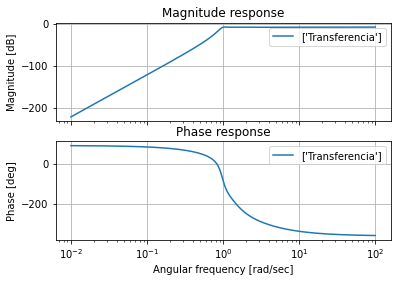

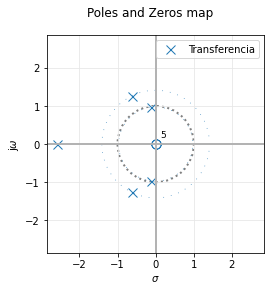

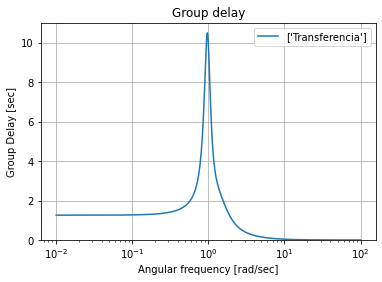

In [3]:
import matplotlib.pyplot as plt
import scipy.signal as sig
from splane import analyze_sys

num = [0.387, 0, 0, 0, 0, 0]
den = [1, 4.08, 7.09, 10.04, 6.19, 4.921]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')

La configuración de polos y ceros difiere principalmente de la del ejercicio 4 en la existencia de un polo sobre el eje real, ya que este filtro es de un orden impar.

Para la etapa de orden 1, utilizamos una red pasiva con la forma:

![Red_pasiva_orden_1](img/ej5_red_pasiva_orden_1.JPG)

Cuya transferencia se expresa como:

$T(s) = \frac{s}{s+\frac{1}{R.C}}$

Para las etapas de orden 2, utilizamos redes pasivas con la forma

![Red_pasiva_orden_2](img/ej5_red_pasiva_orden_2.JPG)

Cuya transferencia se expresa como:

$T(s) = \frac{s^2}{s^2 + s . \frac{R}{L} + \frac{1}{L.C}}$

Asumiendo $C = 1$ para todas las etapas:

Etapa 1:

$\frac{1}{R.C} = 2,59$

$R = \frac{1}{2,59} = 0,386$

Etapa 2:

$\frac{1}{L.C} = 0,95$

$L = \frac{1}{0,95} = 1,05$

$\frac{R}{L} = 0,23$

$R = 0,23 . 1,05 = 0,2415$

Etapa 3:

$\frac{1}{L.C} = 2$

$L = \frac{1}{2} = 0,5$

$\frac{R}{L} = 1,26$

$R = 1,26 . 0,5 = 0,63$

In [4]:
fp = 9600
Ww = 2*np.pi*fp
Wz = 2200

R1_n = 0.386
C1_n = 1
R2_n = 0.2415
L2_n = 1.05
C2_n = 1
R3_n = 0.63
L3_n = 0.5
C3_n = 1

R1_dn = R1_n * Wz
C1_dn = C1_n / (Ww * Wz)
R2_dn = R2_n * Wz
L2_dn = (L2_n * Wz) / Ww
C2_dn = C2_n / (Ww * Wz)
R3_dn = R3_n * Wz
L3_dn = (L3_n * Wz) / Ww
C3_dn = C3_n / (Ww * Wz)

print(f'Etapa 1: R = {R1_dn}')
print(f'Etapa 1: C = {C1_dn}')
print(f'Etapa 2: R = {R2_dn}')
print(f'Etapa 2: L = {L2_dn}')
print(f'Etapa 2: C = {C2_dn}')
print(f'Etapa 3: R = {R3_dn}')
print(f'Etapa 3: L = {L3_dn}')
print(f'Etapa 3: C = {C3_dn}')

Etapa 1: R = 849.2
Etapa 1: C = 7.535745411548075e-09
Etapa 2: R = 531.3
Etapa 2: L = 0.038296658181487316
Etapa 2: C = 7.535745411548075e-09
Etapa 3: R = 1386.0
Etapa 3: L = 0.018236503895946343
Etapa 3: C = 7.535745411548075e-09


## Simulación

### Circuito Pasivo

![Circuito](img/ej5_circuito_desnormalizado.JPG)

![Transferencia](img/ej5_transferencia_desnormalizada.JPG)

![Cursores](img/ej5_transferencia_cursores.JPG)

### Circuito Activado

![Circuito_activado](img/ej5_circuito_activado.JPG)

![Transferencia_activada](img/ej5_transferencia_activada.JPG)

![Cursores_activado](img/ej5_transferencia_activada_cursores.JPG)